<html>
<head>
<title> float image and text </title>
<style type="text/css">
p{
    background: linear-gradient(#2193b0,#6dd5ed);
font-size: 16px;
width:;
border: 2px solid black;
height: 250px; }
img{
opacity:0.9;
padding: 10px;
float: left; }
</style>
</head>
<body>
<h1 style="background: linear-gradient(#2193b0,#6dd5ed);"> BOSTON HOUSE PRICES </h1>

<img width="40%" src="jjj.jpg"> 
    <p>
    The dataset provides information about various factors that might affect the median value of owner-occupied homes in different neighborhoods in Boston, Massachusetts.
    It consists of 506 instances or samples, each representing a different neighborhood. For each neighborhood, there are 13 input features (or independent variables) that describe different aspects of the area,
    and the target variable (or dependent variable) is the median value of owner-occupied homes in thousands of dollars.

</p>
</body>
</html>

- library Used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


In [3]:
c_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

a = pd.read_csv(r'E:/EDA/EDA - Bost/housing.csv', header=None,delimiter=r"\s+", names=c_name )
df = a.copy()

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
df.shape

(506, 14)

- Data size : 506 * 14 = 7084 values
- data shape : 506 rows under 14 variables

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

# iNFORMATION ABOUT DATA
- 1. CRIM: per capita crime rate by town
- 2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- 3. INDUS: proportion of non-retail business acres per town
- 4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- 5. NOX: nitric oxides concentration (parts per 10 million)
- 6. RM: average number of rooms per dwelling
- 7. AGE: proportion of owner-occupied units built prior to 1940
- 8. DIS: weighted distances to five Boston employment centres
- 9. RAD: index of accessibility to radial highways
- 10. TAX: full-value property-tax rate per $10,000
- 11. PTRATIO: pupil-teacher ratio by town 
- 12. B: 1000(Bk−0.63)2 where Bk is the proportion of  blacks by town 
- 13. LSTAT: % lower status of the population  or Proportion of population that is lower status = 1/2 (proportion of adults without, some high school education and proportion of male workers classified as laborers).

- 14. MEDV: Median value of owner-occupied homes in $1000s 
----- medv - taking as price 


In [10]:
df.rename(columns={'MEDV':'values'}, inplace=True)

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,values
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,values
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- extreme variations seem in the statistical values of data
- wherever mean value shows extreame fluctuations. 


In [13]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'values'],
      dtype='object')

# Analysis 




In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,values
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- OUTLIERS YES OR NOT 

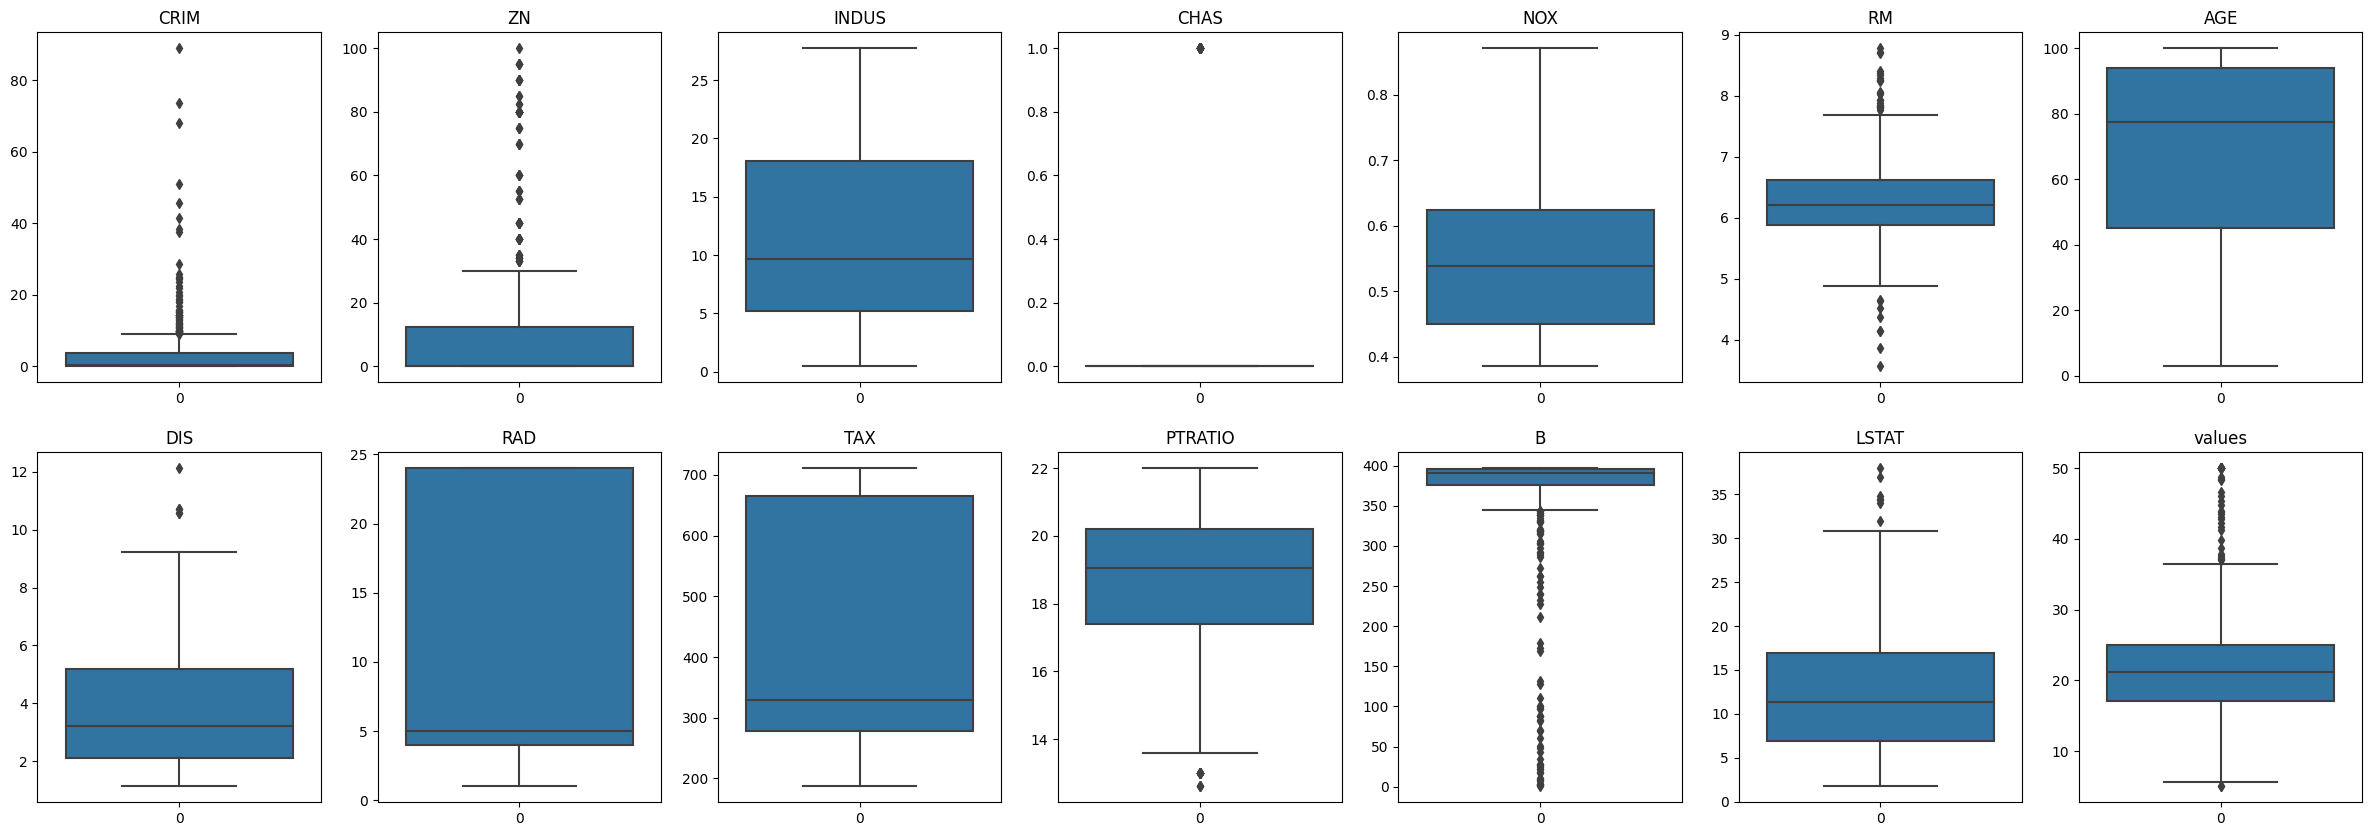

In [15]:
c_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'values']
fig = plt.figure(figsize=(30,10))

for i , j in enumerate(c_name):
    
    ax= fig.add_subplot(2,7,i+1)
    sns.boxplot(df[j])
    plt.title(j)


- so here we can see 
- 1.CRIM, ZN, RM, B , PRICE have heavy outliers 
- 2 chas , dis , ptratio , lstat small outliers 

# let's caluculate the outliers 

In [16]:
df.shape

(506, 14)

- if value bot between min and max values of attribute then it will be outliers 
- q1 = 0.25 quantile
- q3 = 0.75 quantile 
- iqr = q3 - q1
- if value < q1- 1.5* iqr -- outliers 
- if value > q3+1.5*iqr -- outliers
- so let's calculate the percent of the outliers for each attribute


In [17]:
c_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'values']

def outliers (name,a):
    for i in c_name:

        q1 = a[i].quantile(0.25)

        q3 = a[i].quantile(0.75)

        iqr = q3 - q1

        minn = q1 - 1.5* iqr

        maxx = q3+1.5*iqr

        col = a[(a[i]<minn) | (a[i]>maxx)] 

        percent = round(col.shape[0]*100/ a.shape[0],3)
        

        print(f'{i}    outliers percent  : {percent}% \n')
        
outliers(c_name, df)

CRIM    outliers percent  : 13.043% 

ZN    outliers percent  : 13.439% 

INDUS    outliers percent  : 0.0% 

CHAS    outliers percent  : 6.917% 

NOX    outliers percent  : 0.0% 

RM    outliers percent  : 5.929% 

AGE    outliers percent  : 0.0% 

DIS    outliers percent  : 0.988% 

RAD    outliers percent  : 0.0% 

TAX    outliers percent  : 0.0% 

PTRATIO    outliers percent  : 2.964% 

B    outliers percent  : 15.217% 

LSTAT    outliers percent  : 1.383% 

values    outliers percent  : 7.905% 



data

In [18]:
c_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'values']

def outliers (c_name,a):
    for i in c_name:

        q1 = a[i].quantile(0.25)

        q3 = a[i].quantile(0.75)

        iqr = q3 - q1

        minn = q1- 1.5* iqr

        maxx = q3+1.5*iqr

        col = a[(a[i]<minn) | (a[i]>maxx)] 
    return col

outli = outliers(c_name, df)
outli.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,values
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0


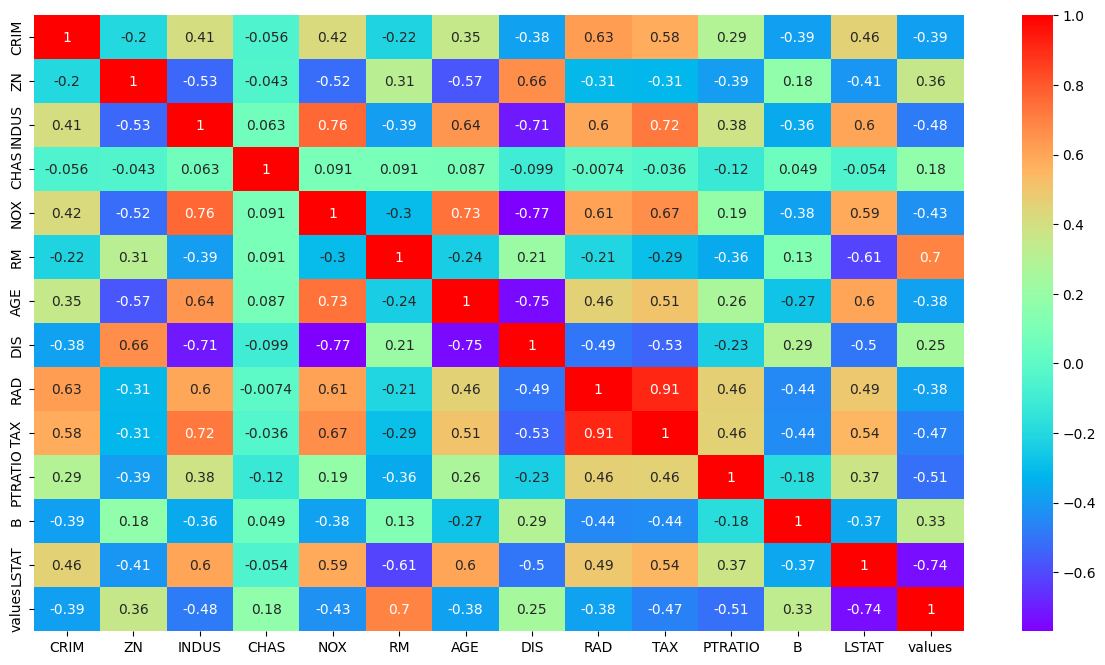

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,cmap='rainbow')
plt.yticks(rotation = 90)
plt.show()

In [20]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

# interest on beside river or not 

- 4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- so here we can see chas attrirubute is a discrete variable which is belong to 0 an 1
- 0 - for those customer who don't want to buy near the river
- 1 - for those customers who want to buy near the river

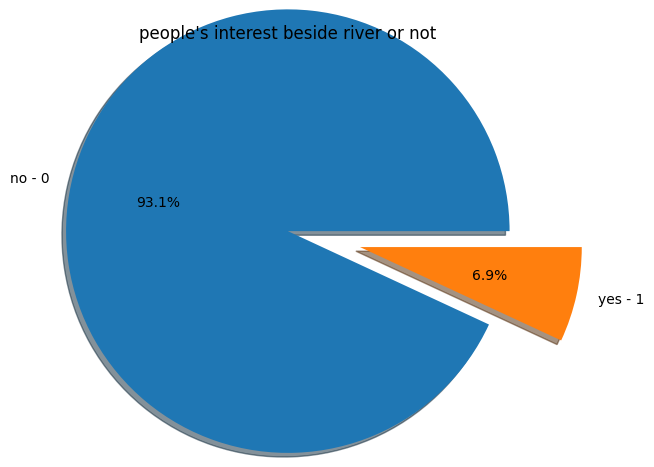

In [21]:
plt.pie(df['CHAS'].value_counts(), labels=['no - 0','yes - 1'],shadow=True, explode=[0,0.5], autopct='%0.1f%%', radius=1.5)
plt.title("people's interest beside river or not")

plt.show()

- so 93.1 % population ignore the river maybe fear about flood
- and 6.9 % population like to settle beside the river 

<h1> comparison between CRIM and PRICE

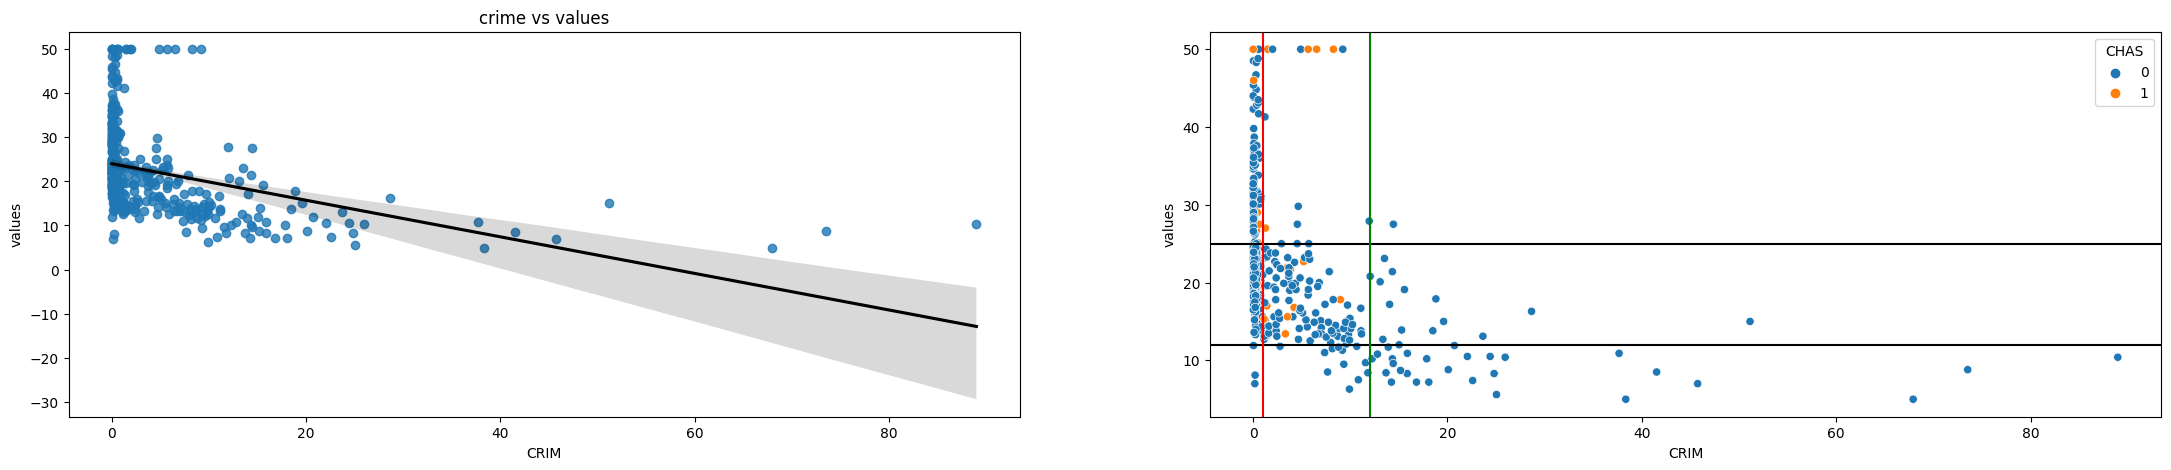

In [22]:
plt.figure(figsize=(27,5))
plt.subplot(1,2,1)
sns.regplot(df, x='CRIM', y='values', line_kws={"color":'black'})
plt.title("crime vs values")
plt.subplot(1,2,2)
sns.scatterplot(df, x='CRIM', y = 'values',hue='CHAS')
plt.axhline(12, color = 'black')
plt.axhline(25, color = 'black')
plt.axvline(12, color = 'green'  )
plt.axvline(1, color = 'red')
plt.show()



In boston city crime rate wise property values in decreasing and increasing manner so i want to say if crim rate higher than that particular area property value is lower or vice versa.

 but by anlysing this dataset we can say price can be higher but population does not care about that they need first safety . crime rate 0 to 1 prices continuesly increasing  but sometime price is not affordable so people sacrificing and most of the population lying between 12 to 25 value and crime rate 0 to 12 but in the higher crim rate area popultion is lower .

- 1- first regplot try to show here crim and values realtion 
- 2- second scatter plot show here most of the population living propery 

# COMPARISON BETWEEN ROOM AND VALUES

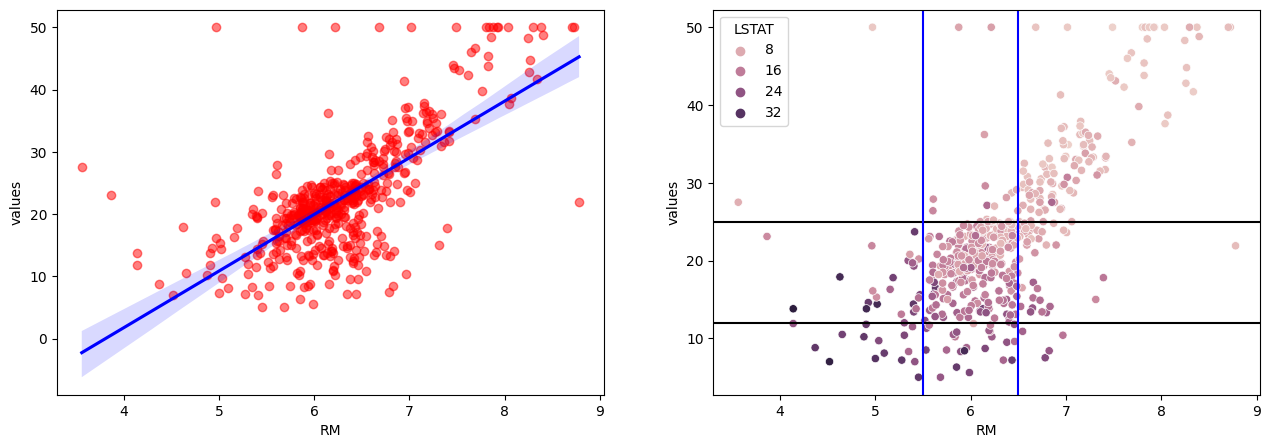

In [23]:
plt.figure(figsize=(24,5))
plt.subplot(1,3,1)
sns.regplot(df,y= 'values' , x = 'RM', scatter_kws={'color':'red','alpha':0.5}, line_kws={'color':'blue'})
plt.subplot(1,3,2)

sns.scatterplot(df, y='values', x= 'RM' , hue='LSTAT')
plt.axhline(12, color='black')
plt.axhline(25, color='black')
plt.axvline(5.5, color='blue')
plt.axvline(6.5, color='blue')
plt.show()


Every property's room number increasing and values also increasing . it's natural - property high and value high 
- And after anlysing data popultion choose those area where values affordable and lstat ratio lying between in normal range


- but some how we can see property size  or room no increases but value still low why?
- Reason lstat ratio little bit higher according to data set and there property values lower.

- here one more why?

# comparison between the LSTAT and Values

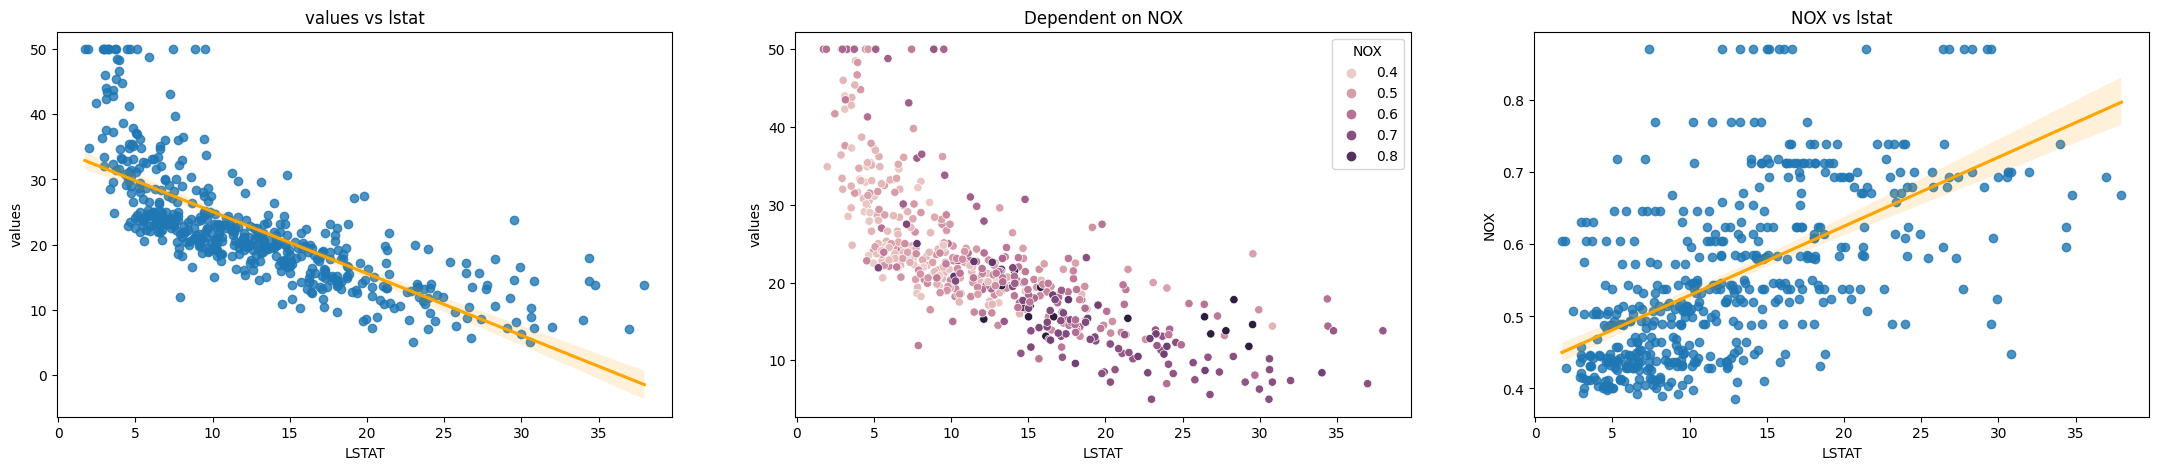

In [24]:
plt.figure(figsize=(27,5))
plt.subplot(1,3,1)
sns.regplot(df, x='LSTAT', y= 'values', line_kws={'color': 'orange'})
plt.title("values vs lstat")

plt.subplot(1,3,2)
sns.scatterplot(df, x='LSTAT', y='values', hue='NOX')
plt.title("Dependent on NOX")

plt.subplot(1,3,3)
sns.regplot(df, x='LSTAT', y='NOX', line_kws={'color':'orange'})
plt.title("NOX vs lstat")
plt.show()

- Here is the previous scenerio justified - that where lstat is increasing values also decreasing cause in the next scatterplot showing the the enviroment of the area polluted and the next graph showing how enviroment and lstat are related to each other

- where lstat is increasing and nox also increasing  

- one more why ? why  nox is increasing? is there any connection with lstat ? where lstat is a ratio of labours and nox is related to enviroment That's mean labours people making this pollution

#  comparison between Distance and values

<AxesSubplot: xlabel='DIS', ylabel='values'>

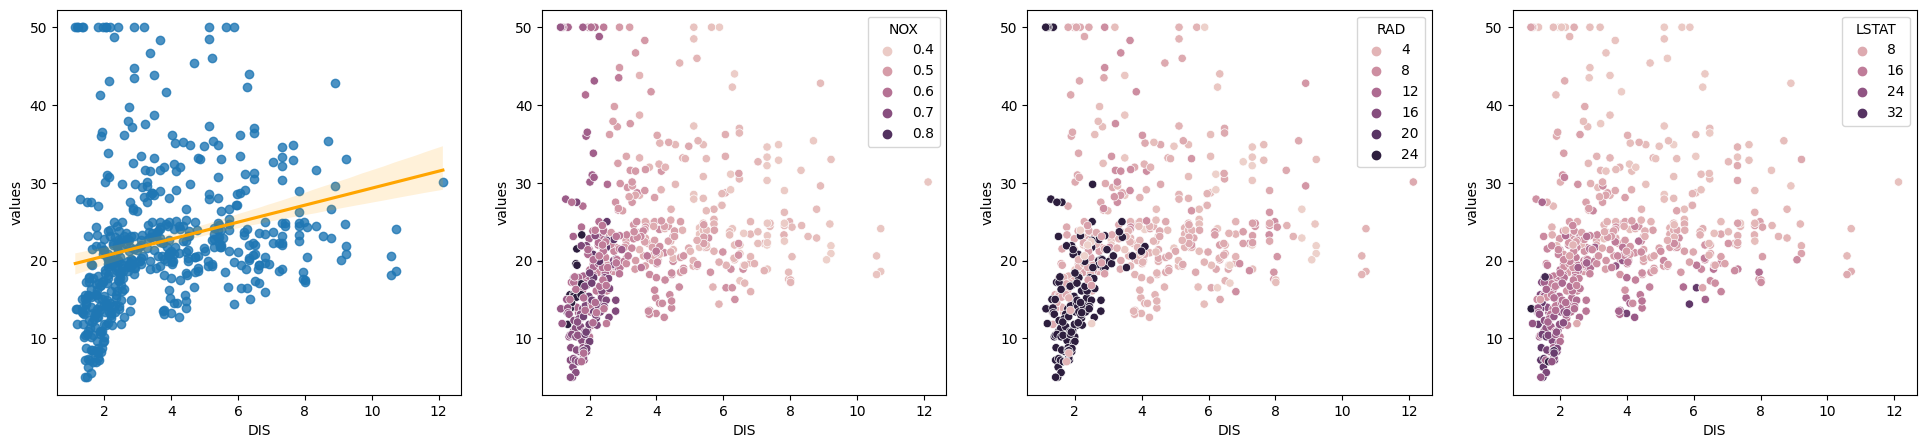

In [25]:
plt.figure(figsize=(24,5))
plt.subplot(1,4,1)
sns.regplot(df, x='DIS', y= 'values', line_kws={'color':'orange'})
plt.subplot(1,4,2)
sns.scatterplot(df, x='DIS', y = 'values', hue='NOX')
plt.subplot(1,4,3)
sns.scatterplot(df, x='DIS', y = 'values', hue='RAD')
plt.subplot(1,4,4)
sns.scatterplot(df, x='DIS', y = 'values', hue='LSTAT')



justified - here is the reason property faraway from the boston employment center and values also increasing  and not also that near the working centers area is polluted
- Road accessibility is high it's natural that road accibility is high and  area will not be polluted by car no it's a damm lie
- and the last labours are also living near the working center 

# Assumption comes True

<AxesSubplot: xlabel='ZN', ylabel='DIS'>

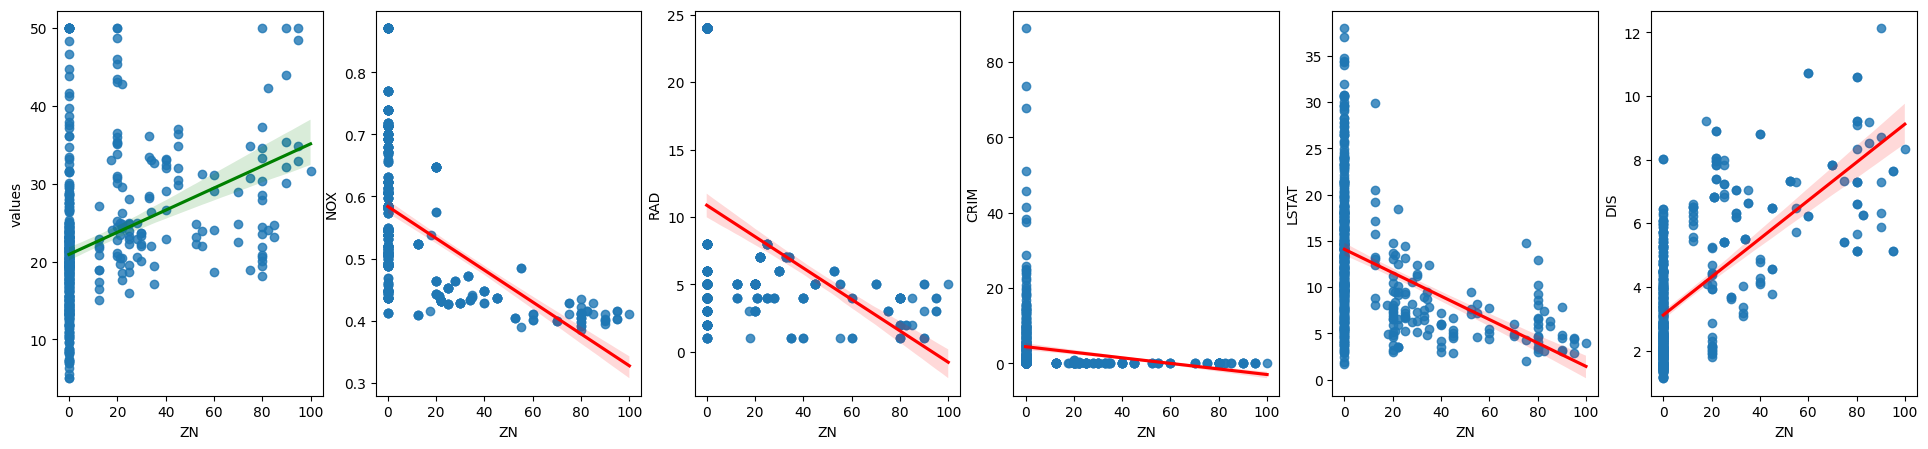

In [26]:
plt.figure(figsize=(24,5))
plt.subplot(1,6,1)
sns.regplot(df, x='ZN' , y= 'values', line_kws={'color': 'green'})
plt.subplot(1,6,2)
sns.regplot(df, x='ZN' , y='NOX', line_kws={'color':'red'})
plt.subplot(1,6,3)
sns.regplot(df, x='ZN' , y='RAD',line_kws={'color':'red'})
plt.subplot(1,6,4)
sns.regplot(df, x='ZN' , y='CRIM',line_kws={'color':'red'})
plt.subplot(1,6,5)
sns.regplot(df, x='ZN' , y='LSTAT',line_kws={'color':'red'})
plt.subplot(1,6,6)
sns.regplot(df, x='ZN' , y='DIS',line_kws={'color':'red'})

# comparison between INDUS AND ZN

<AxesSubplot: xlabel='INDUS', ylabel='ZN'>

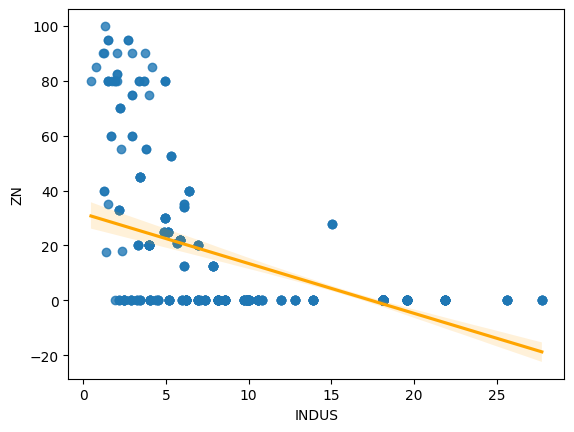

In [27]:
sns.regplot(df, y='ZN', x='INDUS',line_kws={'color':'orange'},)

# Society 

# comaparison between PTRATIO and values  (society also one more factor )

<AxesSubplot: xlabel='PTRATIO', ylabel='values'>

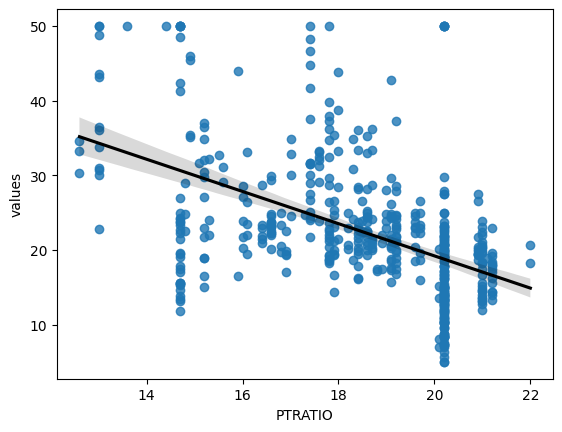

In [28]:
sns.regplot(df, x='PTRATIO' , y='values' , line_kws={'color': 'black'})

# comparison between values and age where age  is ( proportion of owner-occupied units built prior to 1940)

<AxesSubplot: xlabel='AGE', ylabel='values'>

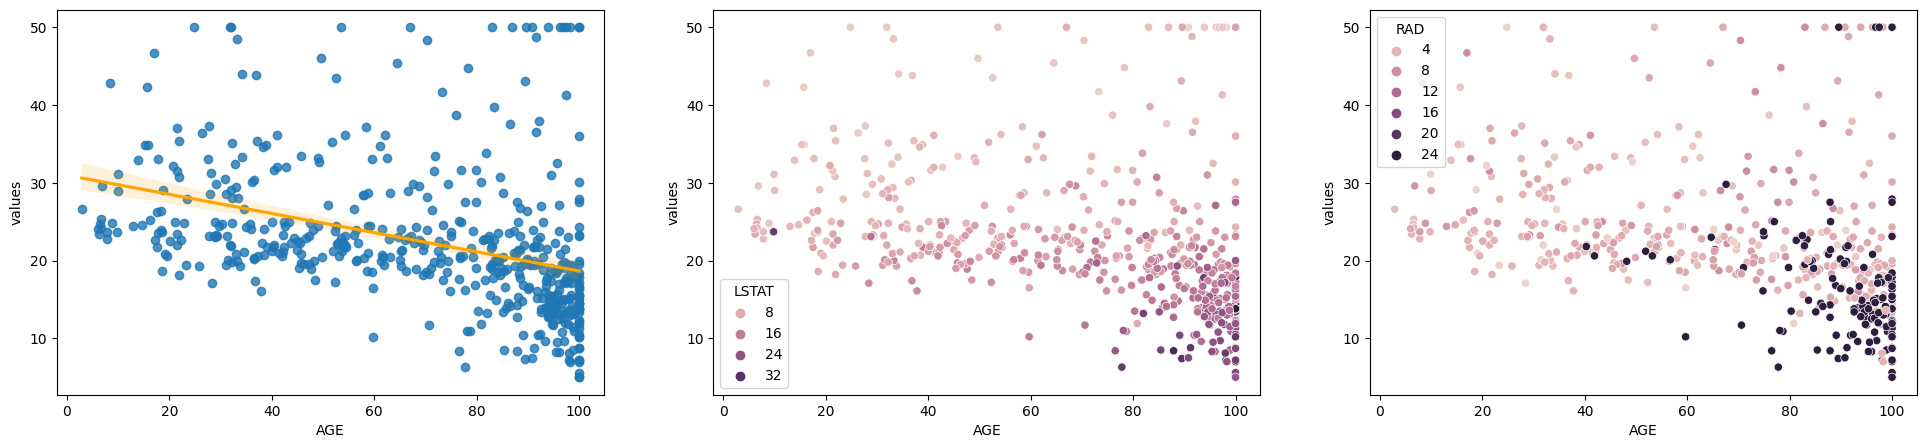

In [29]:
plt.figure(figsize=(24,5))
plt.subplot(1,3,1)
sns.regplot(df, x='AGE', y='values', line_kws={'color': 'orange'})
plt.subplot(1,3,2)
sns.scatterplot(df,x='AGE', y='values', hue='LSTAT')
plt.subplot(1,3,3)
sns.scatterplot(df,x='AGE', y='values',hue='RAD')



- here age indicates how much old age property is there basically it's a old property ratio so may be property old but now days that area comes near the employment center where 1940 time there are no employment center 
- not also that rad and lstat is also high there so values come lower 